In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [23]:
df=pd.read_excel(f"Данные.xlsx")
df

,Название,Цена,Класс энергопотребления,Объём,Мин. температура морозильный камеры,Макс. температура морозильный камеры,Мин. температура холодильной камеры,Макс. температура холодильной камеры,Дисплей,Энергопотребление
0,DEXP B4-39AMA,38999,A+,405,-24.0,-16.0,2.0,8.0,Есть,328.5
1,Samsung RT22HAR4DSA,39999,A+,243,NaN,NaN,NaN,NaN,Нет,243.0
2,Hotpoint HT 7201I M O3,40999,A+,357,-26.0,-18.0,2.0,8.0,Есть,304.0
3,Samsung RT25HAR4DWW/WT,40999,A+,264,-18.0,NaN,NaN,NaN,Нет,253.0
4,Side by Side TCL P650SB,41799,A+,595,-22.0,-15.0,2.0,8.0,Есть,453.0
5,Eigen Stark-RF22,41799,A+,427,-24.0,-16.0,2.0,8.0,Есть,354.0
6,Eigen Stark-RF32,42799,A+,427,-24.0,-16.0,2.0,8.0,Есть,354.0
7,Side by Side Aceline SBS45AKA,42999,A+,500,-24.0,-15.0,2.0,8.0,Есть,365.0
8,Samsung RB29FSRNDWW,44999,A+,311,-23.0,-15.0,1.0,7.0,Есть,357.0
9,Samsung RB36T604FWW/WT,44999,A+,375,-23.0,-15.0,1.0,7.0,Есть,310.0


In [24]:
df.columns

Index(['Название', 'Цена', 'Класс энергопотребления', 'Объём',
       'Мин. температура морозильный камеры ',
       'Макс. температура морозильный камеры',
       'Мин. температура холодильной камеры',
       'Макс. температура холодильной камеры', 'Дисплей', 'Энергопотребление'],
      dtype='object')

In [25]:
osn=df[['Цена','Объём','Энергопотребление']]
osn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Цена               19 non-null     int64  
 1   Объём              19 non-null     int64  
 2   Энергопотребление  18 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 588.0 bytes


In [26]:
medi=osn['Энергопотребление'].quantile(.5)
osn=osn.fillna(value=medi)
osn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Цена               19 non-null     int64  
 1   Объём              19 non-null     int64  
 2   Энергопотребление  19 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 588.0 bytes


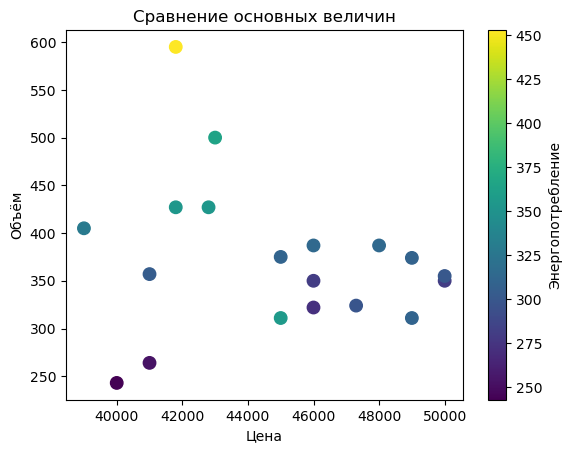

In [27]:
osn.plot.scatter(x='Цена',y='Объём',c='Энергопотребление',s=80,colormap='viridis',title='Сравнение основных величин')
plt.show()

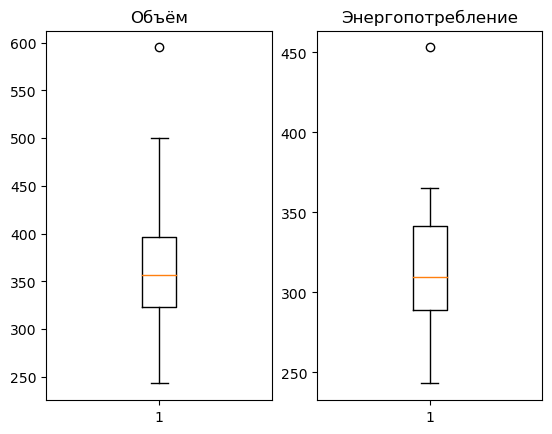

In [28]:
figure, axis = plt.subplots(1, 2) 


axis[0].boxplot(osn['Объём'])
axis[0].set_title('Объём')

axis[1].boxplot(osn['Энергопотребление'])
axis[1].set_title('Энергопотребление')



plt.show() 

In [59]:
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    maxi = max(x[x<Upper_Fence])
    mini = min(x[x>Lower_Fence])
    return maxi-mini

In [60]:
min_Pr=osn['Цена'].min()
Pr_step=(iqr_fence(osn['Цена']))/5

min_V=osn['Объём'].min()
V_step=(iqr_fence(osn['Объём']))/5

min_Energy=osn['Энергопотребление'].min()
Energy_step=(iqr_fence(osn['Энергопотребление']))/5

osn['Оценка цены']=(5-(osn['Цена']-min_Pr)/Pr_step).round().astype(int)
osn['Оценка объёма']=((osn['Объём']-min_V)/V_step).round().astype(int)
osn['Оценка энергопотребления']=(5-(osn['Энергопотребление']-min_Energy)/Energy_step).round().astype(int)
kf=osn[['Оценка цены','Оценка объёма','Оценка энергопотребления']]

In [61]:
def norm(x):
    if x<1:
        return 1
    if x>5:
        return 5
    return x
kf=kf.applymap(norm)
kf.head()

,Оценка цены,Оценка объёма,Оценка энергопотребления
0,5,3,1
1,5,1,5
2,4,2,2
3,4,1,5
4,4,5,1


In [608]:
Pr_kf=0.45
V_kf=0.35
Enr_kf=0.20
kf['Результат']=kf['Оценка цены']*Pr_kf+kf['Оценка объёма']*V_kf+kf['Оценка энергопотребления']*Enr_kf
kf=kf[['Результат']]

In [609]:
ans = pd.merge(df, kf, left_index=True, right_index=True)
ans.sort_values(by='Результат',ascending=False,).head()

,Название,Цена,Класс энергопотребления,Объём,Мин. температура морозильный камеры,Макс. температура морозильный камеры,Мин. температура холодильной камеры,Макс. температура холодильной камеры,Дисплей,Энергопотребление,Результат
4,Side by Side TCL P650SB,41799,A+,595,-22.0,-15.0,2.0,8.0,Есть,453.0,3.75
1,Samsung RT22HAR4DSA,39999,A+,243,NaN,NaN,NaN,NaN,Нет,243.0,3.60
0,DEXP B4-39AMA,38999,A+,405,-24.0,-16.0,2.0,8.0,Есть,328.5,3.50
5,Eigen Stark-RF22,41799,A+,427,-24.0,-16.0,2.0,8.0,Есть,354.0,3.40
7,Side by Side Aceline SBS45AKA,42999,A+,500,-24.0,-15.0,2.0,8.0,Есть,365.0,3.30


# 